In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import logging
from pathlib import Path

import numpyro

from hb_mep.config import HBMepConfig
from hb_mep.data_access import DataClass
from hb_mep.models.saturated_exponential import SaturatedExponential

numpyro.set_platform('cpu')
numpyro.set_host_device_count(4)

PARENT_PATH = Path(os.getcwd()).parent.absolute()
FORMAT = "%(asctime)s - %(name)s - %(levelname)s - %(message)s"
logging.basicConfig(format=FORMAT, level=logging.INFO)

#### Load config

In [3]:
config = HBMepConfig()
config.CURRENT_PATH = PARENT_PATH

#### Load data and preprocess

In [4]:
data = DataClass(config)
df, encoder_dict = data.build()

2023-03-07 20:34:07,560 - hb_mep.data_access.core - INFO - Reading data ....
2023-03-07 20:34:07,565 - hb_mep.data_access.core - INFO - Processing data ...
2023-03-07 20:34:07,605 - hb_mep.utils.utils - INFO - func:build took: 0.04 sec


#### Initialize model

In [5]:
model = SaturatedExponential(config)

#### Run MCMC inference

In [6]:
mcmc, posterior_samples = model.sample(df=df)

2023-03-07 20:34:08,042 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
2023-03-07 20:34:08,043 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-03-07 20:34:08,043 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-03-07 20:34:08,044 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
2023-03-07 20:34:08,045 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'plugin': xla_extension has no attributes named get_plugin_device_client. Compile TensorFlow with //tensorflow/compiler/xla/python:enable_plugin_device set to true (defaults to false) to enable this.
2023-03-07 20:34:08,095 - hb_mep.models.baseline - INFO - Running inference wit

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

2023-03-07 20:36:32,679 - hb_mep.utils.utils - INFO - func:sample took: 2 min and 24.64 sec


#### Diagnostics

In [7]:
mcmc.print_summary()


                                             mean       std    median      5.0%     95.0%     n_eff     r_hat
                                 a[0,0]      6.91      0.07      6.93      6.79      6.99     88.14      1.05
                                 a[0,1]      2.00      0.04      2.00      1.94      2.06     80.65      1.05
                                 a[0,2]      2.05      0.04      2.05      1.99      2.11     59.09      1.06
                                 a[0,3]      2.26      0.04      2.26      2.20      2.31    481.64      1.01
                                 a[0,4]      3.04      0.02      3.05      3.00      3.08   7361.71      1.00
                         a_global_scale      1.33      0.95      1.10      0.05      2.69    682.17      1.01
                        a_level_mean[0]      5.84      1.78      6.51      2.35      8.01   3095.60      1.00
                        a_level_mean[1]      2.06      0.84      2.02      0.60      3.26    305.75      1.02
         

#### Plot fitted curves

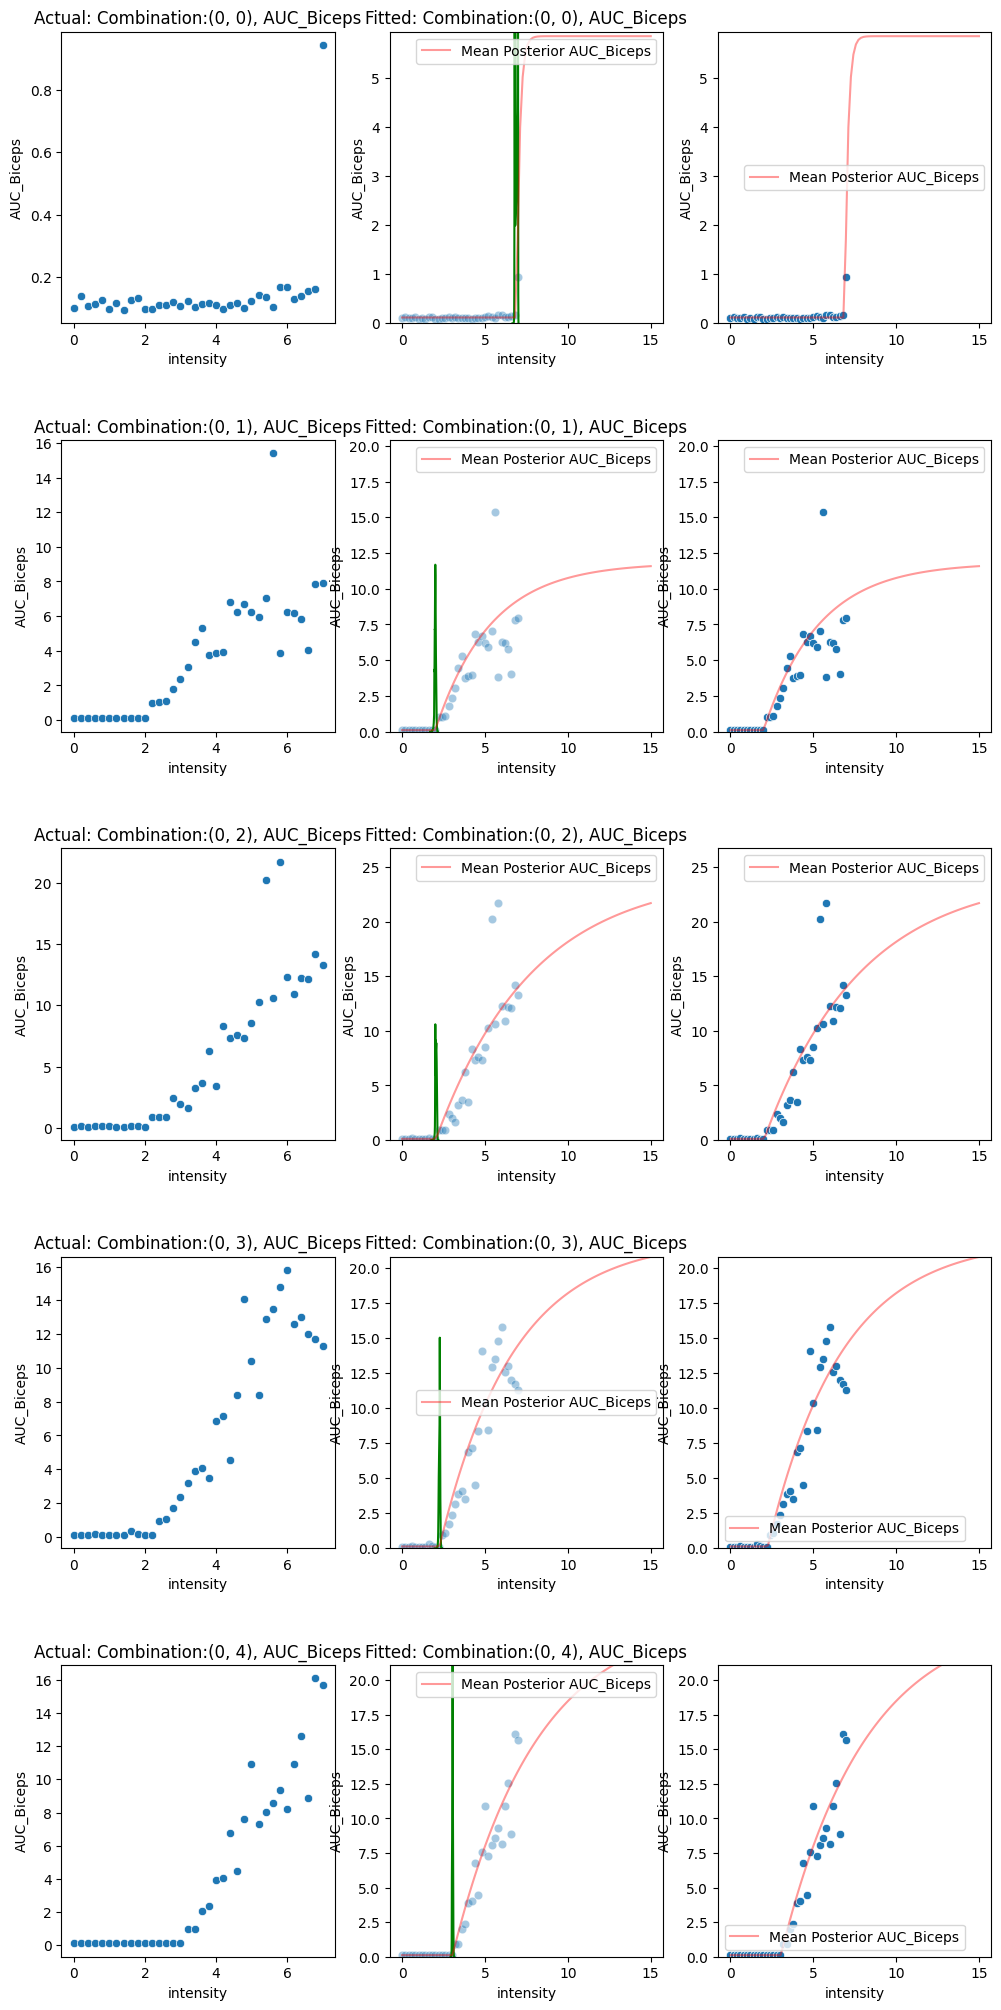

In [8]:
model.plot_fit(df=df, posterior_samples=posterior_samples);

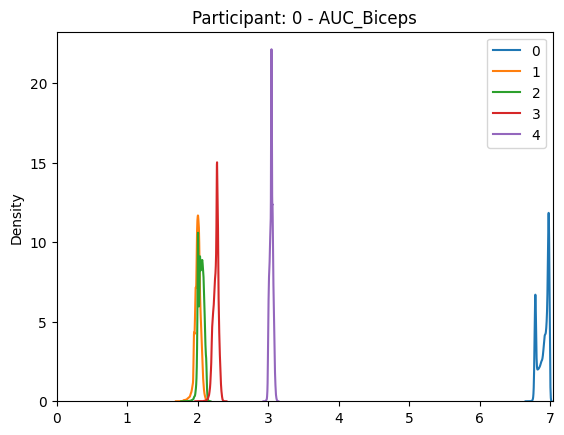

In [9]:
model.plot_kde(df=df, posterior_samples=posterior_samples);